In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [18]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

# Female, male
colors = ['#5175bc', '#d23a47']

## Load table

In [19]:
bias_sc = pd.read_csv('../../data/bias_super_cited.csv')

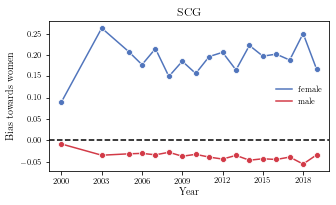

In [20]:
width = 345 / 2
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=2))
with sns.color_palette(colors):
    g = sns.lineplot(x="Year", y="Bias", hue="Gender", data=bias_sc, marker="o",
                hue_order=['female', 'male'], ax=ax)
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("Bias towards women")
ax.set_xticks(range(2000, 2020, 3))
ax.set_title('SCG')
# plt.xticks(rotation=90)
ax.legend(frameon=False)
plt.tight_layout()
fig.savefig('../../figures/bias_super_cited.pdf')

In [21]:
bias_sc.groupby('Gender').mean()

,Year,Bias
Gender,,
female,2010.764706,0.190904
male,2010.764706,-0.036649


In [22]:
bias = pd.read_csv('../../data/bias.csv')

In [23]:
bias.groupby('Gender').mean()

,Year,Bias
Gender,,
female,2010.764706,0.211669
male,2010.764706,-0.040484


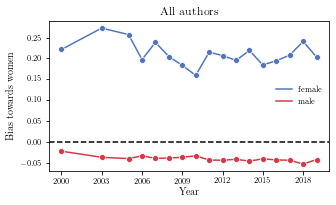

In [24]:
width = 345 / 2
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=2))
with sns.color_palette(colors):
    g = sns.lineplot(x="Year", y="Bias", hue="Gender", data=bias, marker="o",
                hue_order=['female', 'male'], ax=ax)
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("Bias towards women")
ax.set_xticks(range(2000, 2020, 3))
ax.set_title('All authors')
# plt.xticks(rotation=90)
ax.legend(frameon=False)
plt.tight_layout()
fig.savefig('../../figures/bias.pdf')